                                           IMPORTING THE REQUIRED LIBRARY

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

                                    READING THE DATASET AND GETTING TO KNOW THE DATASET

In [3]:
df= pd.read_csv("Stress-Lysis.csv")

In [4]:
df.head(5)

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [5]:
df.shape

(2001, 4)

In [6]:
df["Stress Level"].nunique()

3

In [7]:
            """
    0 stands for low stress
    1 stands for medium stress
    2 stands for high stress
            """
df["Stress Level"].unique()


array([1, 2, 0], dtype=int64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [9]:
#Statistical Analysis of each columns
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


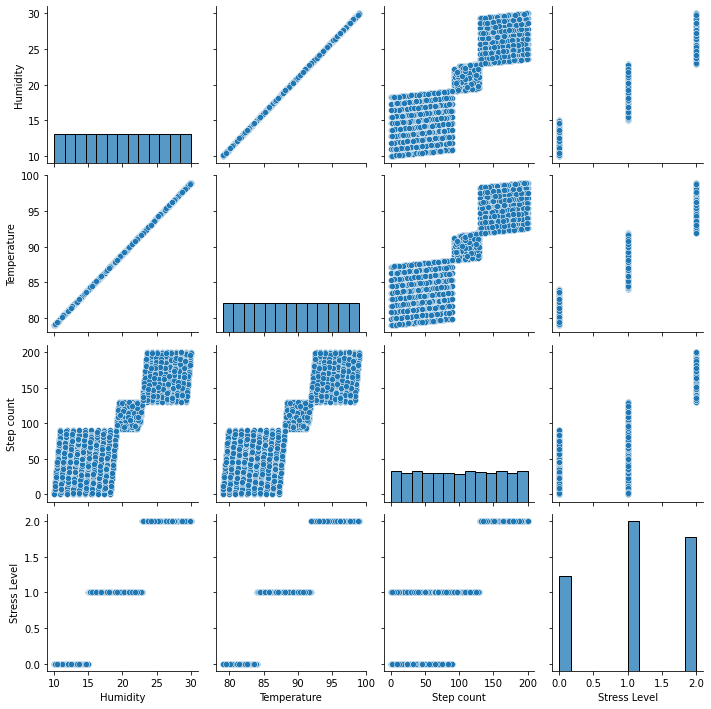

In [10]:
sns.pairplot(df)

In [11]:
                    """
        From the correlation table below
        the target column which is the Stress Level is highly positively correlated with other factors
        This simply means that as this factors increases, there is a corresponding increase in the stress level
                    """
df.corr()

,Humidity,Temperature,Step count,Stress Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step count,0.870486,0.870486,1.000000,0.832623
Stress Level,0.936036,0.936036,0.832623,1.000000


                                                   PREPROCESSING
                Scaling the dataset so their distance apart are close so as not have unsual impact on the model

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scalar= StandardScaler()

In [14]:
scalar.fit(df.drop("Stress Level",axis=1))

StandardScaler()

In [15]:
scaled_feature= scalar.transform(df.drop("Stress Level",axis=1))

In [16]:
scaled_feature

array([[ 0.23024766,  0.23024766,  0.39297226],
       [ 0.24409715,  0.24409715, -0.12277161],
       [ 1.23260403,  1.23260403,  1.64794901],
       ...,
       [ 1.24991588,  1.24991588,  0.59926981],
       [-1.30531382, -1.30531382, -0.62132402],
       [-0.54186104, -0.54186104, -0.86200449]])

In [17]:
df.columns

Index(['Humidity', 'Temperature', 'Step count', 'Stress Level'], dtype='object')

In [18]:
df_new= pd.DataFrame(scaled_feature, columns=['Humidity', 'Temperature', 'Step count'])

In [19]:
df_new.head(5)

,Humidity,Temperature,Step count
0,0.230248,0.230248,0.392972
1,0.244097,0.244097,-0.122772
2,1.232604,1.232604,1.647949
3,1.322626,1.322626,1.321311
4,-1.580572,-1.580572,-0.225920


                                               BUILDING A MODEL

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X= df_new
y= df["Stress Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model= LogisticRegression()

In [24]:
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
prediction= model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       164
           1       0.99      1.00      1.00       220
           2       1.00      1.00      1.00       217

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
print(confusion_matrix(y_test,prediction))

[[163   1   0]
 [  0 220   0]
 [  0   1 216]]


                          Interpretation of the confusion Matrix
                        Predicted Low      Predicted Medium     Predicted High
    Actual Low              163                  1                   0
    Actual Medium            0                  220                  0
    Actual High              0                   1                  216                   
    
    163 Predicted low stress as against Actual 164
    222 Predicted Medium as against the Actual 220
    216 Predicted High as against the Actual 217